# **EMAIL-SPAM-DETECTION WITH MACHINE LEARNING**

---



Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let's get started!

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


**Upload Dataset**

In [ ]:
em=pd.read_csv('spam.csv',encoding='latin1')

**Top 5 rows of dataset**

In [ ]:
em.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Random 5 rows**

In [ ]:
em.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3961,spam,You have been specially selected to receive a ...,NaN,NaN,NaN
775,ham,Thanks for picking up the trash.,NaN,NaN,NaN
3379,ham,Just finished. Missing you plenty,NaN,NaN,NaN
1664,ham,ÌÏ v ma fan...,NaN,NaN,NaN
2783,ham,"Just arrived, see you in a couple days &lt;3",NaN,NaN,NaN


**Total rows and columns in dataset**

In [ ]:
em.shape

(5572, 5)

In [ ]:
print("Total Rows =",em.shape[0])
print("Total Columns =",em.shape[1])

Total Rows = 5572
Total Columns = 5


**Columns in dataset**

In [ ]:
em.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#**Data preprocessing**

## **DATA CLEANING**

*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.*

**Renaming cols**

In [ ]:
#Renaming the columns for better understanding

em.rename(columns={'v1':'Types' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
em.head()

,Types,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Labelling in dataset**

`Types values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively`

In [ ]:
encoder = LabelEncoder()
em['Types'] = encoder.fit_transform(em['Types']) #allotting 0,1
em.head()

,Types,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dataset information**

In [ ]:
#checking the use of extra columns like - Unnamed:2 , Unnamed: 3 , Unnamed: 4
print('Information of dataset:')
em.info() 

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Types       5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


**Dropping extra cols**

In [ ]:
#Rmoving last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4  

em.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

em.head()

,Types,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**check duplicate data in dataset**

In [ ]:
print("Total Duplicated values =",em.duplicated().sum())

Total Duplicated values = 403


**Delete Duplicates**

In [ ]:
em = em.drop_duplicates(keep='first') 

**Check NULL values in dataset**

In [ ]:
print("Total NULL values =\t",em.isnull().sum())

Total NULL values =	 Types    0
Data     0
dtype: int64


In [ ]:
em.sample(6)

,Types,Data
2080,0,Where is it. Is there any opening for mca.
3212,0,What's ur pin?
1444,0,Those ducking chinchillas
3374,0,:)
5304,0,Pls ask macho how much is budget for bb bold 2...
2392,0,"Thanks da thangam, i feel very very happy dear..."


**Size of dataset**

In [ ]:
print("Size of dataset is: ",em.size)

Size of dataset is:  10338


**After Data Cleaning**

In [ ]:
print("After DATA CLEANING : \n")
print("Total Rows :",em.shape[0])
print("Total columns :",em.shape[1])

After DATA CLEANING : 

Total Rows : 5169
Total columns : 2


# **EXPLORATORY DATA ANALYSIS (EDA)**

*Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.*

**Count spam(1) and non-spam(0) mails**

In [ ]:
em['Types'].value_counts()

0    4516
1     653
Name: Types, dtype: int64

In [ ]:
#For tokenize the words , need to dowload the 'punkt' module
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Sentences in each mail**

In [ ]:
#sent_tokenize is breaking according to words
em['sentence'] = em['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) 
em.sample(4)

,Types,Data,sentence
4092,0,"\Life is nothing wen v get everything\"". But \...",3
2931,0,Only 2% students solved this CAT question in '...,2
888,0,You unbelievable faglord,1
2178,0,"I don,t think so. You don't need to be going o...",3


**Words in each text**

In [ ]:
#word_tokenize is breaking according to words
em['words'] = em['Data'].apply(lambda x:len(nltk.word_tokenize(x))) 
em.sample(4)

,Types,Data,sentence,words
3136,0,You're right I have now that I think about it,1,11
2779,0,Well I might not come then...,1,7
5404,0,Pls give her prometazine syrup. 5mls then &lt...,2,19
3257,0,He fucking chickened out. He messaged me he wo...,2,26


**Characters in each text**

In [ ]:
em['chars']= em['Data'].apply(len)
em.sample(4)

,Types,Data,sentence,words,chars
2982,0,What should i eat fo lunch senor,1,7,32
3706,0,Aight do you still want to get money,1,8,36
3891,1,URGENT This is our 2nd attempt to contact U. Y...,4,27,151
3081,0,"And very importantly, all we discuss is betwee...",1,14,61


**Statistics summary of Spam mails**

In [ ]:
sum=em[em['Types'] == 1][['words','sentence','chars']]
sum.describe()

,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.967841,137.891271
std,7.008418,1.483201,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


**Statistics summary of Non-Spam mails**

In [ ]:
sum2=em[em['Types'] == 0][['words','sentence','chars']]
sum2.describe()

,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.120903,1.799601,70.459256
std,13.493725,1.278465,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,28.000000,910.000000


#**Data visualisation**

**HEAT MAP**

[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

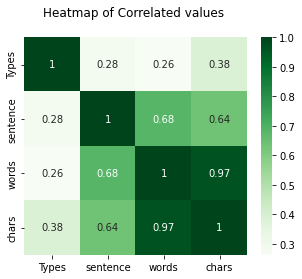

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sea.heatmap(em.corr(), annot=True, cmap="Greens").set(title='Heatmap of Correlated values \n')

### **GRAPHICAL REPRESENTATION OF THE MAILS**

**FOR SENTENCES**

<Figure size 576x360 with 0 Axes>

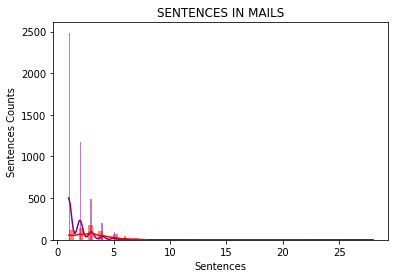

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(em[em['Types'] == 0]['sentence'], color="purple", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(em[em['Types'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

**FOR WORDS**

<Figure size 576x360 with 0 Axes>

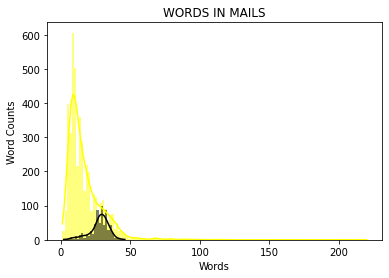

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(em[em['Types'] == 0]['words'], color="yellow", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(em[em['Types'] == 1]['words'], color="black", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS") 
plt.show()

**FOR CHARACTERS**

<Figure size 576x360 with 0 Axes>

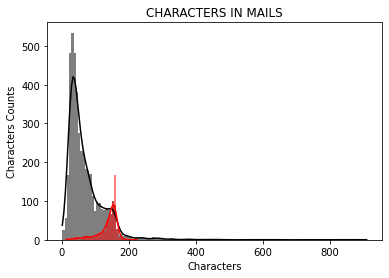

In [ ]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(em[em['Types'] == 0]['chars'], color="black", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(em[em['Types'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

### **PAIRPLOT GRAPHICAL REPRESENTATION**

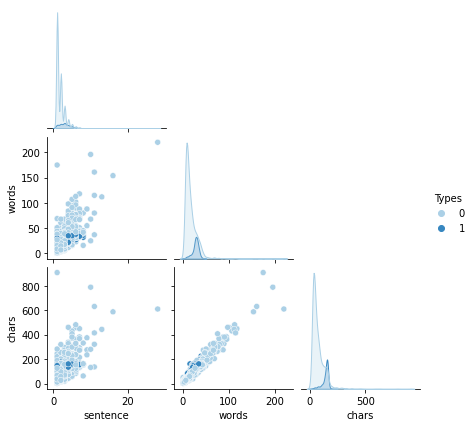

In [ ]:
sea.pairplot(em,hue='Types',corner=True,height=2,palette='Blues')

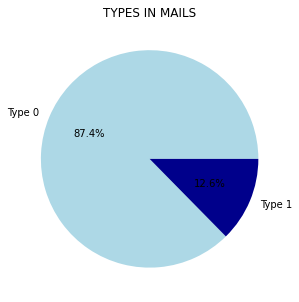

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(em['Types'].value_counts(), labels=['Type 0', 'Type 1'], autopct='%1.1f%%', colors=['lightblue', 'darkblue'])
plt.title("TYPES IN MAILS")
plt.show()

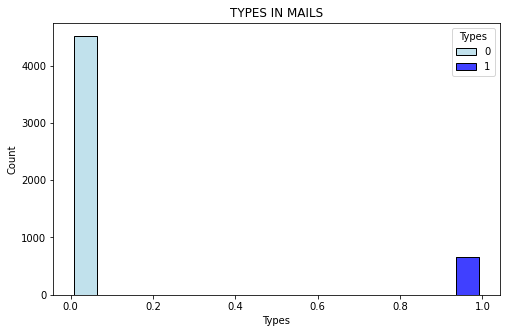

In [ ]:
plt.figure(figsize=(8,5))
sea.histplot(em, x="Types", hue="Types", multiple="stack", shrink=0.8, palette=['lightblue', 'blue'])
plt.title("TYPES IN MAILS")
plt.show()


# **TEXT PRE-PROCESSING**

**Looking for stopwords**

In [ ]:
nltk.download('stopwords')
stopwords.words('english')[:13]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd"]

**Stemming method**

In [ ]:
ps = PorterStemmer()
ps.stem('from') #eg : play , playing , played can be shorten to 'play'  as these all are derived from 'play'

'from'

**Looking for Punctuation marks**

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**function for all steps of Pre-processing**

In [ ]:
def changement(a):
    # convert to lowercase
    a = a.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(a)
    
    # remove special characters and stopwords
    alphanum = [t for t in tokens if t.isalnum() and t not in stopwords.words('english')]
    
    # stemming
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(t) for t in alphanum]
    
    return " ".join(stemmed_tokens)

**Pre-processing on the particular mail as examples**

In [ ]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")

'problem pencil stay sharp long enough'

In [ ]:
changement(" Why don't you wait 'til at least wednesday to see if you get your .")

'wait least wednesday see get'

**Apply Pre-processed texts to all dataset**

In [ ]:
em['pre-processed'] = em['Data'].apply(changement)
em.tail(8)

,Types,Data,sentence,words,chars,pre-processed
5564,0,Why don't you wait 'til at least wednesday to ...,1,16,67,wait least wednesday see get
5565,0,Huh y lei...,1,4,12,huh lei
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,1,30,147,remind o2 get pound free call credit detail gr...
5567,1,This is the 2nd time we have tried 2 contact u...,4,35,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,1,9,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",2,15,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,1,27,125,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,2,7,26,rofl true name


**Check the dimensions again**

In [ ]:
em.shape

(5169, 6)

# **MODEL BUILDING**

**Assigning variable X and Y to columns**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Y = em['Types'].values
X = em['pre-processed']

**Train-Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

In [ ]:
X_train.shape

(4135,)

In [ ]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])

Total No of Rows  : 5169
Rows for training : 4135
Rows for testing  : 1034


**Feature Extraction**

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
X_train_features.shape

(4135, 3000)

## **TRAIN THE MODEL USING KNN**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_features, Y_train)

KNeighborsClassifier()

### **Model Evaluation**

**Prediction on training data**

In [ ]:
prediction_on_training_data = knn.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data*100)

Accuracy on training data :  92.79322853688029


**Prediction on testing data**

In [ ]:
prediction_on_test_data = knn.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data *100)

Accuracy on test data :  90.81237911025146


**DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART**

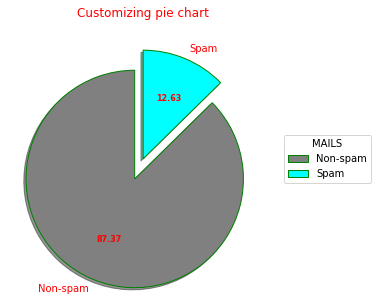

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(em['Types'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

# ***EMAIL SPAM DETECTOR***

---



**Take User Input**

In [ ]:
user_mail = input("Enter the text of the email :\n\n")

Enter the text of the email :

my dear friend


In [ ]:
processed=changement(user_mail)
processed

'dear friend'

**Apply Feature Extraction**

In [ ]:
input_data_features = feature_extraction.transform([processed])

print("After Feature Extraction :\n\n",input_data_features)

After Feature Extraction :

   (0, 1155)	0.7160592022941482
  (0, 846)	0.6980395539006855


**Perform Prediction Over User Input**

In [ ]:
predicted_output = knn.predict(input_data_features)

print("Predicted Output :\n\n",predicted_output)

Predicted Output :

 [0]


**Check of mail**

In [ ]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail
